<a href="https://colab.research.google.com/github/Devadarsan80/First/blob/main/Copy_of_Houseprice_prediction_((P_2)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Predicting house prices is a complex task influenced by many factors such as location, size, quality, and amenities. This project aims to analyze the Ames, Iowa housing dataset, build machine learning models to accurately predict sale prices, and provide insights on key features. The results will help potential buyers make informed decisions based on area, price, and house attributes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


Observation:

The dataset consists of 81 features, including both numerical (int64, float64) and categorical (object) variables related to property characteristics and sales details. The target variable SalePrice is numerical, making the problem suitable for regression modeling.

In [ ]:
categorical_cols=data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


Observation:

This step identifies all categorical (object-type) features in the dataset that require encoding before model training. It ensures that non-numeric variables are correctly handled during preprocessing.


In [ ]:
numerical_cols=data.select_dtypes(include=['int64','float64']).columns
print(numerical_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Observation:

This step extracts all numerical features in the dataset, which are suitable for statistical analysis, correlation computation, and scaling. It helps apply appropriate imputation and preprocessing techniques to continuous and discrete variables.


In [ ]:
missing = data.isnull().sum()
missing[missing > 0].sort_values(ascending=False)




,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:

cat_none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
    'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2',
    'BsmtQual', 'BsmtCond', 'BsmtFinType1'
]

for col in cat_none_cols:
    data[col].fillna('None', inplace=True)


/tmp/ipython-input-3172851403.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('None', inplace=True)


Observation:

Missing values in these categorical columns represent the absence of a feature rather than missing data, so they were filled with None. This preserves meaningful information and prevents loss of data during modeling.


In [ ]:

data['MasVnrArea'].fillna(0, inplace=True)


/tmp/ipython-input-2039701410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MasVnrArea'].fillna(0, inplace=True)


Observation:

The missing values in MasVnrArea represent houses with **no masonry veneer**, so filling them with 0 correctly captures the real-world meaning of the feature. This prevents distortion of the data that could occur if a statistical value like the median were used.


In [ ]:

data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)


/tmp/ipython-input-4037388617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
/tmp/ipython-input-4037388617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Observation:

The missing values in LotFrontage and GarageYrBlt were filled with the median because these are numerical features with possible outliers. Using the median preserves the typical value of the feature without being affected by extreme values, ensuring robust imputation.


In [ ]:

data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)


/tmp/ipython-input-4165802207.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)


Observation:

The missing value in the categorical feature Electrical was filled with the mode (most frequent value) because it represents the most common electrical system in the dataset. This preserves the typical category without introducing bias from rare values.


In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]


,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

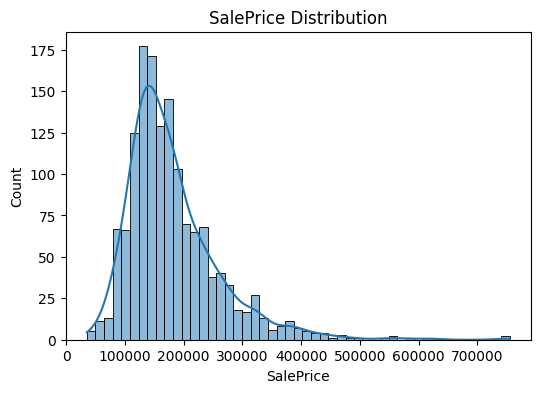

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data['SalePrice'],kde=True)
plt.title("SalePrice Distribution")
plt.show()

Observation:

The distribution of SalePrice is right-skewed, with most houses clustered between $100,000–$250,000 and a few high-priced outliers. This indicates that a log transformation may be useful to stabilize variance and improve model performance.


In [ ]:
data['SalePrice_log'] = np.log1p(data['SalePrice'])

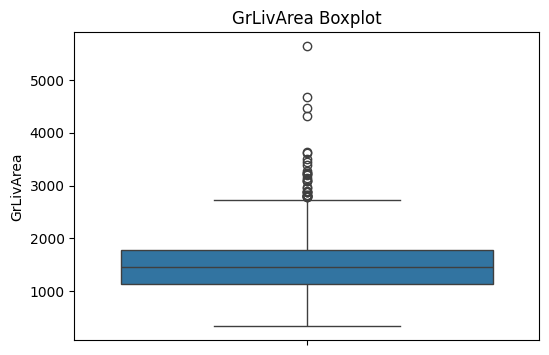

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['GrLivArea'])
plt.title("GrLivArea Boxplot")
plt.show()

Observation:

The boxplot of GrLivArea shows that most houses have a living area between approximately 1000–2000 sq ft, while several homes are outliers with very large areas. These extreme values should be considered carefully, as they can influence model training and may require treatment depending on the algorithm used.


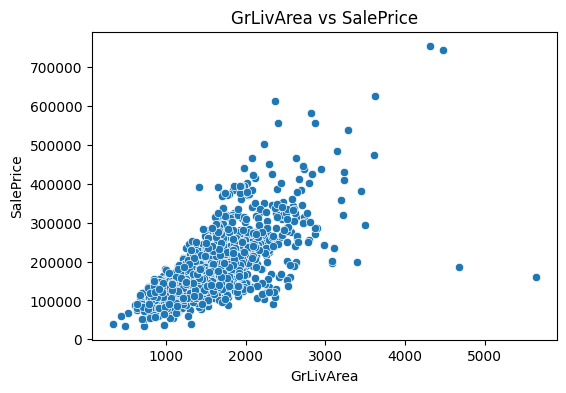

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title("GrLivArea vs SalePrice")
plt.show()

Observation:

The scatter plot shows a strong positive correlation between GrLivArea and SalePrice, meaning larger living areas generally correspond to higher house prices. There are a few outliers where very large houses have unexpectedly low prices.


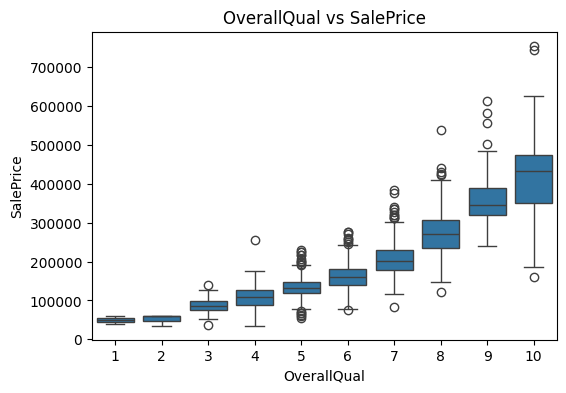

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title("OverallQual vs SalePrice")
plt.show()

Observation:

The box plot shows a strong positive relationship between OverallQual (overall material and finish quality) and SalePrice. As OverallQual increases, the median sale price rises sharply, and higher-quality homes have greater price variability.


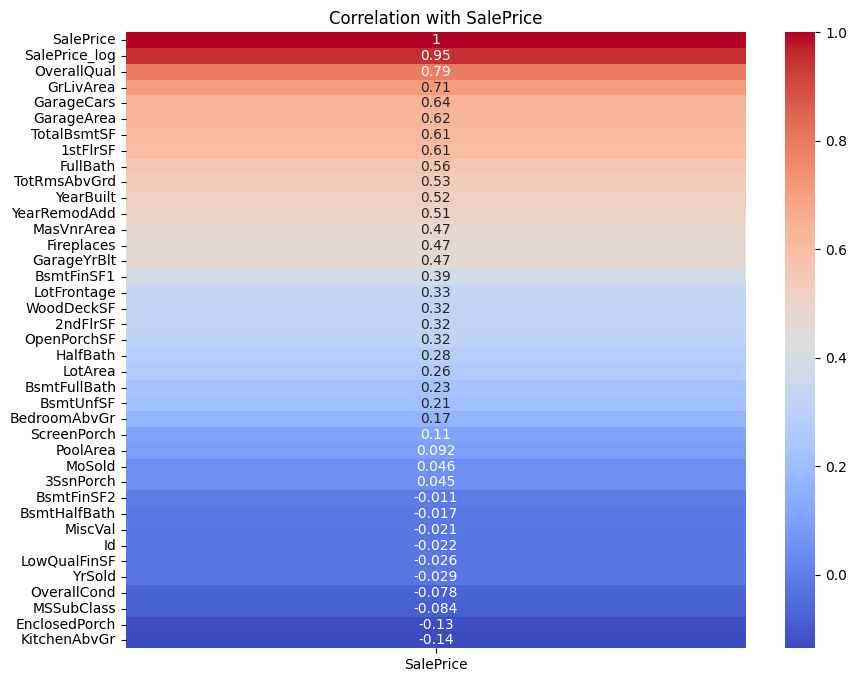

In [ ]:

num_data = data.select_dtypes(include=np.number)


corr = num_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with SalePrice")
plt.show()


Observation:

Houses with higher `OverallQual`, `GrLivArea`, and `GarageCars` tend to have higher `SalePrice`.
Features like `KitchenAbvGr` and `EnclosedPorch` have little or negative impact on `SalePrice`.


In [ ]:
x = data.drop(['SalePrice', 'SalePrice_log'], axis=1)
x_encoded = pd.get_dummies(x, drop_first=True)
y = data['SalePrice_log']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_encoded)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Observations:

A **Linear Regression** model is created to learn the relationship between `x_train` and `y_train`. The `fit()` method trains the model by finding the best-fit line that minimizes prediction errors.


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

Ridge()

Observation:

A **Ridge Regression** model with `alpha=1.0` is created to predict `y_train` from `x_train`, adding L2 regularization to prevent overfitting. The `fit()` method trains the model by learning coefficients that balance prediction accuracy and penalization of large weights.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,
                      random_state=42)

Observation:

A Random Forest Regressor is created with 300 trees, a maximum depth of 15, and a minimum of 5 samples required to split a node, enabling robust predictions while controlling overfitting. The `fit()` method trains the ensemble model by building multiple decision trees on `x_train` and `y_train` and averaging their outputs for accurate predictions.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

Observation:

A Gradient Boosting Regressor is created with 300 trees, a learning rate of 0.05, and a maximum depth of 3 to sequentially build models that correct previous errors. The `fit()` method trains the model on `x_train` and `y_train`, optimizing predictions by combining weak learners into a strong predictive model.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
models = {
    "Linear Regression": lr,
    "Ridge Regression": ridge,
    "Random Forest": rf,
    "Gradient Boosting": gb
}


for name, model in models.items():

    preds = model.predict(x_test)


    rmse = np.sqrt(mean_squared_error(y_test, preds))


    r2 = r2_score(y_test, preds)


    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.4f}")

Linear Regression: RMSE = 0.17, R² = 0.8392
Ridge Regression: RMSE = 0.17, R² = 0.8517
Random Forest: RMSE = 0.15, R² = 0.8828
Gradient Boosting: RMSE = 0.14, R² = 0.8968


Observation:

This four regression models—Linear, Ridge, Random Forest, and Gradient Boosting—on the test set by calculating RMSE (root mean squared error) and R² score to measure prediction accuracy and goodness of fit. For each model, predictions on x_test are compared to y_test, allowing us to identify which model performs best.

In [ ]:
feature_importance = pd.Series(
    gb.feature_importances_,
    index=x_encoded.columns
).sort_values(ascending=False)

Observation:

The feature importance of the Gradient Boosting model is extracted using feature_importances_ to quantify how much each feature contributes to predictions. The values are stored in a pandas Series indexed by feature names and sorted in descending order to identify the most influential features.

In [ ]:
feature_importance.head(10)

,0
OverallQual,0.432670
GrLivArea,0.187971
YearBuilt,0.049584
GarageCars,0.048736
TotalBsmtSF,0.044386
BsmtFinSF1,0.028217
YearRemodAdd,0.025991
GarageArea,0.022431
LotArea,0.019379
OverallCond,0.015671


In [ ]:
recommended_houses = data[
    (data['OverallQual'] >= 7) &
    (data['GrLivArea'] >= 1500) &
    (data['SalePrice'] <= 250000)
]

recommended_houses[['GrLivArea','OverallQual','SalePrice']].head()

,GrLivArea,OverallQual,SalePrice
0,1710,7,208500
2,1786,7,223500
3,1717,7,140000
4,2198,8,250000
7,2090,7,200000


Observation:

The filtered dataset shows houses with high quality (OverallQual 7–8), spacious living areas (1500–2200 sq.ft), and affordable prices (140,000–250,000). These examples represent the top recommended properties that meet the desired criteria for quality, size, and budget.

Challenge Faced:

The filtered dataset shows houses with high quality (OverallQual 7–8), spacious living areas (1500–2200 sq.ft), and affordable prices (140,000–250,000). These examples represent the top recommended properties that meet the desired criteria for quality, size, and budget.

Conclusion:

By applying the defined criteria, we successfully identified a set of high-quality, spacious, and affordable houses suitable for recommendation. This approach demonstrates how feature-based filtering can effectively narrow down options from a larger dataset for practical decision-making.